# MARKET BASKET ANALYSIS

In the retail sector, this analysis is used to discover patterns and relationships within transactions and transaction items-sets (Items frequently bought together).

## IBM puts it as:

"Market Basket Analysis is used to increase marketing effectiveness and to improve cross-sell and up-sell opportunities by making the right offer to the right customer. For a retailer, good promotions translate into increased revenue and profits. The objectives of the market basket analysis models are to identify the next product that the customer might be interested to purchase or to browse."

 This explanation clearly gives the intent of running the analysis : "to improve cross-sell and up-sell opportunities.

## Apriori Algorithm:
The algorithm was first proposed in <b>1994 by Rakesh Agrawal and Ramakrishnan Srikant</b>. Apriori algorithm finds the most frequent itemsets or elements in a transaction database and identifies association rules between the items.

## How Apriori works
To construct association rules between elements or items, the algorithm considers 3 important factors which are, support, confidence and lift. Each of these factors is explained as follows:
### Support:
The support of item I is defined as the ratio between the number of transactions containing the item I by the total number of transactions expressed as :
<img src="support.png" alt="Support formula" title="Support" />
### Confidence:
This is measured by the proportion of transactions with item I1, in which item I2 also appears. The confidence between two items I1 and I2,  in a transaction is defined as the total number of transactions containing both items I1 and I2 divided by the total number of transactions containing I1.
<img src="confidence.png" alt="Confidence formula" title="Confidence" />
### Lift:
Lift is the ratio between the confidence and support expressed as :
<img src="lift.png" alt="Lift formula" title="Lift" />

## Example to understand the above concepts:
Suppose we have a record of 1 thousand customer transactions, and we want to find the Support, Confidence, and Lift for two items e.g. burgers and ketchup.\
Out of one thousand transactions, 100 contain ketchup while 150 contain a burger. Out of 150 transactions where a burger is purchased, 50 transactions contain ketchup as well.\
Using this data, we want to find the support, confidence, and lift.
### Support:
Support refers to the default popularity of an item.\
Support(A) = (Transactions containing (A))/(Total Transactions)\
For instance if out of 1000 transactions, 100 transactions contain Ketchup then the support for item Ketchup can be calculated as:

Support(Ketchup) = (Transactions containingKetchup)/(Total Transactions)\
Support(Ketchup) = 100/1000 = 10%
### Confidence:
Confidence refers to the likelihood that an item B is also bought if item A is bought.\
Confidence(A→B) = (Transactions containing both (A and B))/(Transactions containing A)\
We had 50 transactions where Burger and Ketchup were bought together. While in 150 transactions, burgers are bought.\
Then we can find likelihood of buying ketchup when a burger is bought can be represented as confidence of Burger -> Ketchup and can be mathematically written as:

Confidence(Burger→Ketchup) = (Transactions containing both (Burger and Ketchup))/(Transactions containing Burger)\
Confidence(Burger→Ketchup) = 50/150 = 33.3%
### Lift:
Lift(A -> B) refers to the increase in the ratio of sale of B when A is sold.\
Lift(A→B) = (Confidence (A→B))/(Support (B))\
The Lift(Burger -> Ketchup) can be calculated as:

Lift(Burger→Ketchup) = (Confidence (Burger→Ketchup))/(Support (Ketchup))\
Lift(Burger→Ketchup) = 33.3/10 = 3.33


Lift basically tells us that the likelihood of buying a Burger and Ketchup together is 3.33 times more than the likelihood of just buying the ketchup.\
A Lift of 1 means there is no association between products A and B. Lift of greater than 1 means products A and B are more likely to be bought together.\
Finally, Lift of less than 1 refers to the case where two products are unlikely to be bought together.

In [1]:
! pip install mlxtend

In [2]:
! pip install wordcloud

In [3]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules

In [4]:
# Loading the data
data=pd.read_excel("D:\\20-6-19\\PROJECTS\\MARKET BASKET ANALYSIS\\Online Retail.xlsx",nrows=s)
# glimpse of the dataset
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# Columns of the dataset
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
# Shape of the data 
data.shape

(541909, 8)

In [7]:
# Information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


We see there are some missing values in Description and CustomerID columns.

In [8]:
# Missing values count
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
# Exploring the different unique countries of transactions
data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [11]:
# Checking different number of unique countries present in this dataset
x = data['Country'].nunique()
print("There are {} number of unique countries.".format(x))

There are 38 number of unique countries.


In [12]:
# No of values for each country
data.Country.value_counts() 

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [13]:
# Total number of transactions
len(data['InvoiceNo'].unique())

25900

In [14]:
# checking how many unique customer IDs are there

x = data['CustomerID'].nunique()

# printing the value
print("There are {} number of different customers".format(x))

There are 4372 number of different customers


### Cleaning the data

In [15]:
# Removing the extra spaces in the description column using strip()
data['Description'] = data['Description'].str.strip()

In [16]:
# Changing the type of invoice_no to string to help in removing the transactions done on credit
data['InvoiceNo'] = data['InvoiceNo'].astype('str') 

In [17]:
# Dropping all transactions which were done on credit 
data = data[~data['InvoiceNo'].str.contains('C')] 

### Visualizing

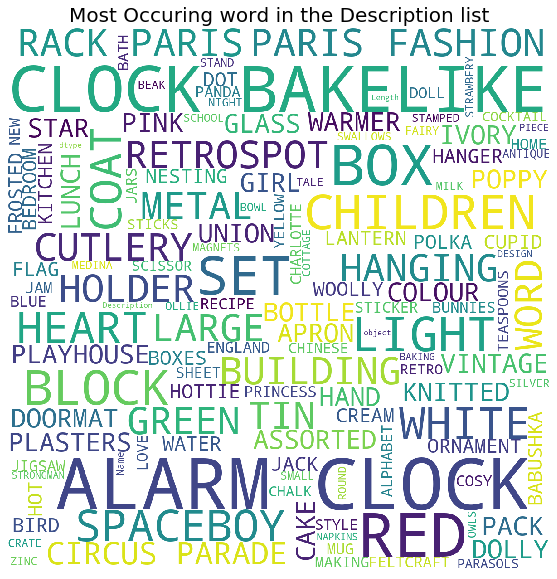

In [18]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white', width = 1200, height = 1200).generate(str(data['Description']))

print(wordcloud)
plt.rcParams['figure.figsize'] = (10, 10)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Occuring word in the Description list', fontsize = 20)
plt.show()

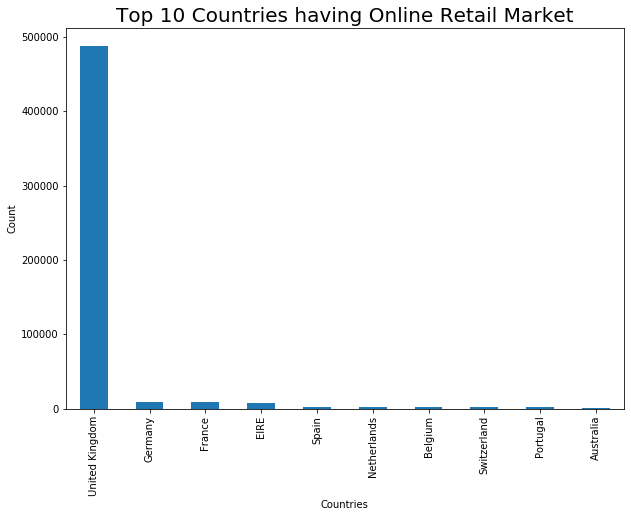

In [19]:
# checking the different values for country in the dataset

data['Country'].value_counts().head(10).plot.bar(figsize = (10, 7))
plt.title('Top 10 Countries having Online Retail Market', fontsize = 20)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()

In [20]:
# checking how many quantity of products have been sold online from each country

data['Quantity'].groupby(data['Country']).agg('sum')

Country
Australia                 84209
Austria                    4881
Bahrain                     314
Belgium                   23237
Brazil                      356
Canada                     2763
Channel Islands            9491
Cyprus                     6361
Czech Republic              671
Denmark                    8235
EIRE                     147447
European Community          499
Finland                   10704
France                   112104
Germany                  119263
Greece                     1557
Hong Kong                  4773
Iceland                    2458
Israel                     4409
Italy                      8112
Japan                     26016
Lebanon                     386
Lithuania                   652
Malta                       970
Netherlands              200937
Norway                    19338
Poland                     3684
Portugal                  16258
RSA                         352
Saudi Arabia                 80
Singapore                  5241


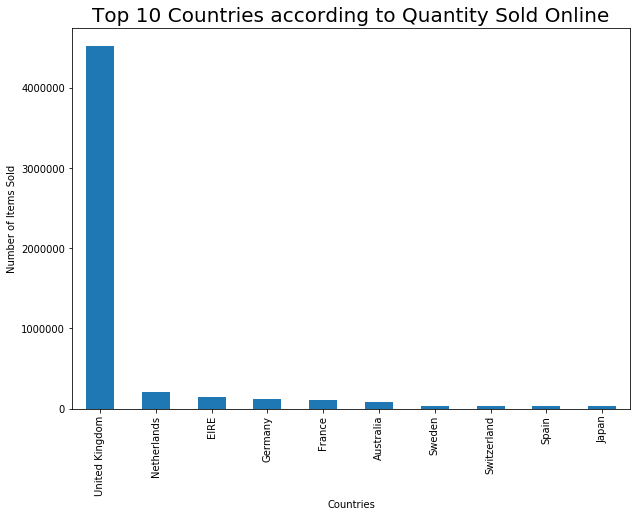

In [21]:
# Having a look at the top 10 Countries in terms of Quantities according to the countries

data['Quantity'].groupby(data['Country']).agg('sum').sort_values(ascending = False).head(10).plot.bar(figsize = (10, 7))
plt.title('Top 10 Countries according to Quantity Sold Online', fontsize = 20)
plt.xlabel('Countries')
plt.ylabel('Number of Items Sold')
plt.show()

### Splitting the data according to the region of transaction

In [40]:
# let's groupby the description according to the invoice no. and date
# This format for the Data is called Basket Format
# Transactions done in UK
basket_UK = (data[data['Country'] =="United Kingdom"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 
basket_UK.shape

(18667, 4175)

In [41]:
# Transactions done in France 
basket_France = (data[data['Country'] =="France"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 
basket_France.shape

(392, 1563)

In [42]:
# Transactions done in Portugal 
basket_Por = (data[data['Country'] =="Portugal"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 
basket_Por.shape

(58, 713)

In [43]:
# Transactions done in Sweden
basket_Sweden = (data[data['Country'] =="Sweden"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 
basket_Sweden.shape

(36, 261)

### Hot Encoding the data

In [26]:
# Defining the hot encoding function to make the data suitable  
# for the concerned libraries 
def hot_encode(x): 
    if(x<= 0): 
        return 0
    if(x>= 1): 
        return 1

In [27]:
# Encoding the datasets 
  
basket_encoded = basket_UK.applymap(hot_encode) 
basket_UK = basket_encoded

basket_encoded = basket_France.applymap(hot_encode) 
basket_France = basket_encoded
  
basket_encoded = basket_Por.applymap(hot_encode) 
basket_Por = basket_encoded 
  
basket_encoded = basket_Sweden.applymap(hot_encode) 
basket_Sweden = basket_encoded 

In [38]:
basket_UK=basket_UK.sample(1000)

### Buliding the models and analyzing the results
#### a) United Kingdom:

In [39]:
# Building the model
frq_items = apriori(basket_UK, min_support = 0.01, use_colnames = True) 

# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules.head() 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\91888\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-39-6d45813fe37a>", line 2, in <module>
    frq_items = apriori(basket_UK, min_support = 0.01, use_colnames = True)
  File "C:\Users\91888\Anaconda3\lib\site-packages\mlxtend\frequent_patterns\apriori.py", line 223, in apriori
    _bools = np.all(X[:, combin], axis=2)
  File "C:\Users\91888\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py", line 2245, in all
    return _wrapreduction(a, np.logical_and, 'all', axis, None, out, keepdims=keepdims)
  File "C:\Users\91888\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py", line 86, in _wrapreduction
    return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\91888\Anaconda3\lib

KeyboardInterrupt: 

#### b) France:

In [36]:
# Building the model 
frq_items = apriori(basket_France, min_support = 0.05, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
45,(JUMBO BAG WOODLAND ANIMALS),(POSTAGE),0.076531,0.765306,0.076531,1.000,1.306667,0.017961,inf
259,"(RED TOADSTOOL LED NIGHT LIGHT, PLASTERS IN TI...",(POSTAGE),0.051020,0.765306,0.051020,1.000,1.306667,0.011974,inf
271,"(RED TOADSTOOL LED NIGHT LIGHT, PLASTERS IN TI...",(POSTAGE),0.053571,0.765306,0.053571,1.000,1.306667,0.012573,inf
300,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975,7.644000,0.086474,34.897959
302,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975,7.077778,0.085433,34.489796


#### c) Portugal:

In [30]:
# Building the model 
frq_items = apriori(basket_Por, min_support = 0.05, use_colnames = True) 

# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1170,(SET 12 COLOUR PENCILS SPACEBOY),(SET 12 COLOUR PENCILS DOLLY GIRL),0.051724,0.051724,0.051724,1.0,19.333333,0.049049,inf
1171,(SET 12 COLOUR PENCILS DOLLY GIRL),(SET 12 COLOUR PENCILS SPACEBOY),0.051724,0.051724,0.051724,1.0,19.333333,0.049049,inf
1172,(SET 12 COLOUR PENCILS DOLLY GIRL),(SET OF 4 KNICK KNACK TINS LONDON),0.051724,0.051724,0.051724,1.0,19.333333,0.049049,inf
1173,(SET OF 4 KNICK KNACK TINS LONDON),(SET 12 COLOUR PENCILS DOLLY GIRL),0.051724,0.051724,0.051724,1.0,19.333333,0.049049,inf
1174,(SET 12 COLOUR PENCILS DOLLY GIRL),(SET OF 4 KNICK KNACK TINS POPPIES),0.051724,0.051724,0.051724,1.0,19.333333,0.049049,inf


#### d) Sweden:

In [31]:
# Building the model
frq_items = apriori(basket_Sweden, min_support = 0.05, use_colnames = True) 

# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PACK OF 72 SKULL CAKE CASES),(12 PENCILS SMALL TUBE SKULL),0.055556,0.055556,0.055556,1.0,18.0,0.052469,inf
1,(12 PENCILS SMALL TUBE SKULL),(PACK OF 72 SKULL CAKE CASES),0.055556,0.055556,0.055556,1.0,18.0,0.052469,inf
4,(36 DOILIES DOLLY GIRL),(ASSORTED BOTTLE TOP MAGNETS),0.055556,0.055556,0.055556,1.0,18.0,0.052469,inf
5,(ASSORTED BOTTLE TOP MAGNETS),(36 DOILIES DOLLY GIRL),0.055556,0.055556,0.055556,1.0,18.0,0.052469,inf
180,(CHILDRENS CUTLERY DOLLY GIRL),(CHILDRENS CUTLERY CIRCUS PARADE),0.055556,0.055556,0.055556,1.0,18.0,0.052469,inf


### References:
1)https://www.ibm.com/support/knowledgecenter/en/SSCJHT_1.0.0/com.ibm.swg.ba.cognos.pci_oth.1.0.0.doc/c_pci_retail_mba.html
2)https://analyticsindiamag.com/beginners-guide-to-understanding-apriori-algorithm-with-implementation-in-python/